<a href="https://colab.research.google.com/github/ajmainrahman/ML-Projects/blob/main/Garlic_Ginger__Resnet152v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = "/content/drive/MyDrive/Dataset/GarlicGingerDataset/Train"
test = "/content/drive/MyDrive/Dataset/GarlicGingerDataset/Test"

In [ ]:
import cv2 as cv

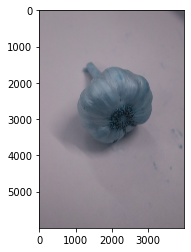

In [ ]:
img = cv.imread("/content/drive/MyDrive/Dataset/GarlicGingerDataset/Train/Garlic/IMG_7753.JPG")
plt.imshow(img)
plt.show()

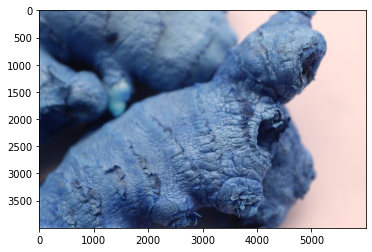

In [ ]:
img = cv.imread("/content/drive/MyDrive/Dataset/GarlicGingerDataset/Train/Ginger/IMG_8312.JPG")
plt.imshow(img)
plt.show()

Since the image is around 100x100, it means the input is around 100x100

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_gen = ImageDataGenerator(
rescale=(1./255),
zoom_range=0.1,
vertical_flip=True,
fill_mode='nearest'
)

In [ ]:
test_gen = ImageDataGenerator(
rescale=(1./255)
)

In [ ]:
train_ds = train_gen.flow_from_directory(
    train,
    batch_size=32,
    class_mode='categorical',
    target_size = (100,100)
)

Found 503 images belonging to 2 classes.


In [ ]:
test_ds = test_gen.flow_from_directory(
test,
batch_size=32,
class_mode='categorical',
target_size=(100,100)
)

Found 117 images belonging to 2 classes.


In [ ]:
model = tf.keras.Sequential([
    tf.keras.applications.resnet_v2.ResNet152V2(include_top=False,weights='imagenet',input_shape=(100,100,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2,activation='softmax')
])

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
model.layers[0].trainable = False

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 4, 4, 2048)        58331648  
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                                 
 dense_8 (Dense)             (None, 1024)              33555456  
                                                                 
 dropout_6 (Dropout)         (None, 1024)              0         
                                                                 
 dense_9 (Dense)             (None, 512)               524800    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 256)              

In [ ]:
plateau = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',patience=1,verbose=1,factor=0.25,min_lr=0.000003)

In [ ]:
class callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if (logs.get('val_accuracy') >= 0.95 and logs.get('accuracy') >= 0.95):
            print("\n\n Accs already reach the target! Stopped \n\n")
            self.model.stop_training = True

In [ ]:
stop_accs = callback()

In [ ]:
hist = model.fit(train_ds,epochs=30,validation_data=(test_ds),callbacks=[stop_accs,plateau])

Epoch 1/30
16/16 [==============================] - 686s 41s/step - loss: 11.5288 - accuracy: 0.8211 - val_loss: nan - val_accuracy: 0.3590 - lr: 0.0100
Epoch 2/30
16/16 [==============================] - ETA: 0s - loss: 0.4191 - accuracy: 0.8509 
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.0024999999441206455.
16/16 [==============================] - 554s 34s/step - loss: 0.4191 - accuracy: 0.8509 - val_loss: nan - val_accuracy: 0.3590 - lr: 0.0100
Epoch 3/30
16/16 [==============================] - 555s 34s/step - loss: 0.4046 - accuracy: 0.8509 - val_loss: 277240710365777062684245622784.0000 - val_accuracy: 0.6410 - lr: 0.0025
Epoch 4/30
16/16 [==============================] - ETA: 0s - loss: 0.4079 - accuracy: 0.8509 
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0006249999860301614.
16/16 [==============================] - 549s 34s/step - loss: 0.4079 - accuracy: 0.8509 - val_loss: 82588883464165141774336.0000 - val_accuracy: 0.6410 - lr: 0.0025
Epoch 5/30
16/

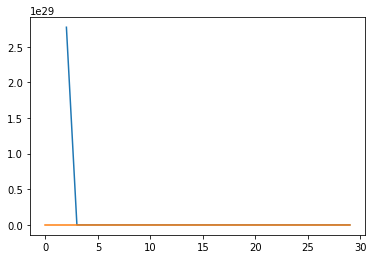

In [ ]:
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])
plt.show()

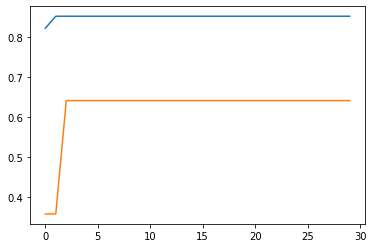

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.show()